In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('./datasets/uber.csv')
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [55]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [56]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime'] = pd.to_numeric(df['pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  int64  
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 15.3+ MB


In [57]:
df.describe()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,1.332428e+18,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,5.822317e+16,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,1.230773e+18,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,1.282724e+18,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,1.332363e+18,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,1.382149e+18,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,1.435708e+18,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [58]:
df.select_dtypes(include=[np.number]).corr()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000587,-0.001125,0.000230,-0.000341,0.000270,0.000271,0.002259
fare_amount,0.000587,1.000000,0.122765,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_datetime,-0.001125,0.122765,1.000000,0.009363,-0.009677,0.008018,-0.010805,0.006398
pickup_longitude,0.000230,0.010458,0.009363,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.000341,-0.008482,-0.009677,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.000270,0.008986,0.008018,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.010805,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002259,0.010158,0.006398,-0.000415,-0.001559,0.000033,-0.000659,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8aad12e990>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8aad12ec10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8aad12e850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8aad12ee90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8aad12efd0>],
 'means': []}

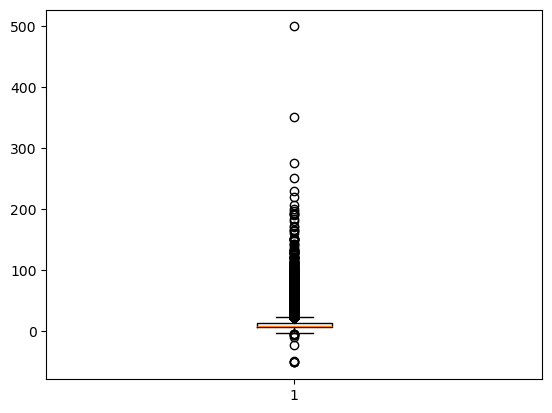

In [59]:
plt.boxplot(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8aad6ea210>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8aad6ea490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8aad6ea0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8aad6ea710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8aad6ea850>],
 'means': []}

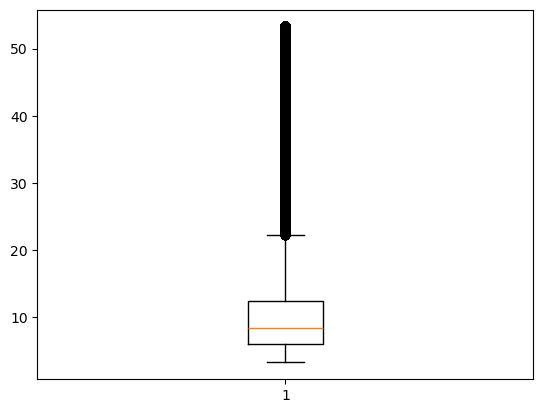

In [60]:
q_low = df['fare_amount'].quantile(0.01)
q_high = df['fare_amount'].quantile(0.99)
df['fare_amount'] = df['fare_amount'].clip(q_low, q_high)
plt.boxplot(df['fare_amount'])

In [62]:
from sklearn.model_selection import train_test_split
x = df.drop('fare_amount', axis = 1)
x = x.drop('key', axis=1)
y = df['fare_amount']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
print(x.dtypes)

Unnamed: 0             int64
pickup_datetime        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


In [63]:
from sklearn.linear_model import LinearRegression


In [64]:
lr = LinearRegression()
lr.fit(x_train, y_train)
predict = lr.predict(x_test)

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predict)))
print("R²:", r2_score(y_test, predict))

MAE: 5.777915927850346
RMSE: 8.919727470520819
R²: 0.016023832789188064


In [66]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(x_train, y_train)

# Make predictions
y_pred = rf.predict(x_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

MAE: 1.94
RMSE: 3.75
R²: 0.826
